In [3]:
import numpy as np
import pandas as pd

# 자연어 처리

## 1. 토크나이징

In [4]:
# 테스트 코드
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences((u"네, 안녕하세요. 반갑습니다.")))

['네, 안녕하세요.', '반갑습니다.']


In [5]:
from konlpy.tag import Okt

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.pos(text)

print(result)

[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았어', 'Verb')]


In [6]:
from konlpy.tag import Kkma

kkma = Kkma()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = kkma.pos(text)

print(result)

[('분명', 'MAG'), ('배달', 'NNG'), ('이', 'JKS'), ('완료', 'NNG'), ('되', 'XSV'), ('었', 'EPT'), ('는데', 'ECD'), ('나', 'NP'), ('는', 'JX'), ('받', 'VV'), ('지', 'ECD'), ('않', 'VXV'), ('았', 'EPT'), ('어', 'EFN')]


In [7]:
from konlpy.tag import Okt

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result1 = okt.pos(text)
result2 = okt.morphs(text)
result3 = okt.nouns(text)

print(result1)
print(result2)
print(result3)

[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았어', 'Verb')]
['분명', '배달', '이', '완료', '되었는데', '나', '는', '받지', '않았어']
['분명', '배달', '완료', '나']


In [8]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ"
text2 = "나는 밥을 먹는다"

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm=True)
result3 = okt.pos(text2, stem=True)

print(result1)
print(result2)
print(result3)

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹다', 'Verb')]


## 1) 데이터 불러오기

In [9]:
# 데이터 불러오기
data = pd.read_csv("data\배달의민족댓글.csv", index_col=0) # index_col로 
data.head()

,댓글
0,NaN
1,NaN
2,NaN
3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...


In [10]:
# 미션1: 첫번째 데이터 댓글을 형태소 분석기로 쪼개보기
data1 = data.iloc[3:,:].reset_index(drop=True)
data1.head()


,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [11]:
# 데이터 저장하기
data1.to_csv("data\배달의민족댓글2.csv")

In [12]:
# 데이터 불러오기
data = pd.read_csv("data\배달의민족댓글2.csv", index_col=0)
data

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
...,...
455,우선 배달업체 광고가 너무 많습니다. 두번째는 주문직전 주소바꾸기 안되는게 매우매우...
456,배민 쭉 써왔고 쓴소리 하나 하려합니다. 중간다리 플랫폼으로서 식당/유저 사이 중재...
457,업데이트된거 디자인 너무 불편해요. 배민1 부분에서 음식점 둘러보는데 빨리 한거번에...
458,첫주문도 아닌데 첫주문 할인받으로 광고 계속오고 친구초대 하려하니까 주문내역이 없다...


In [13]:
# 첫번째 댓글 가져오기
# data1 = data.iloc[0]
# print(data1)

review_one = data["댓글"][0]
print(review_one)

result = okt.pos(review_one)
print(result)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'N

In [14]:
# 처음부터 다섯개의 댓글 가져오기
review_five = data["댓글"][:5]

for i, review in enumerate(review_five.tolist()):
    # print(review)
    # result = okt.pos(review)
    print(result)
    temp_list = []
    for word, pos in result:
        if pos == "Noun":
            temp_list.append(word)
            # print(word, pos)
    print(f"{i}번째 형태소 분석기 결과:\n\t{temp_list}")
    
    # print(f"{i}번째 형태소 분석기 결과:\n\t{result}")



[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('.', 'Punctuation'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adjective'), ('건지', '

In [15]:
text = "오늘!!!!!!!!!!!!!!!!!!!! ㅇㅇ너무 ㅓㅣㅗ hello  HELLO 010-7894-5798     기분 좋아^^ ㅎㅇㅎㅇ"

import re
new_text = re.sub("[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ-\s]", "", text)
# new_text = re.sub("[^0-9a-zA-Z가-힣\s+-]", "", text)
print(new_text)

오늘 ㅇㅇ너무 ㅓㅣㅗ hello  HELLO 010-7894-5798     기분 좋아 ㅎㅇㅎㅇ


In [16]:
# 워드 클라우드
# 목표 : 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1 : 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2 : 불용어 제거(stopwords)

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["댓글"].tolist()):
    # 조건 1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.nouns(new_review)
    for word in result:
        # 조건2 | 조건3
        if len(word) == 1 or word in stopwords:
            continue
        # word_list에 추가
        word_list.append(word)
    print(f"{i}번째 리뷰 : {review}")

0번째 리뷰 : 80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
1번째 리뷰 : 음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) 카드 결제선택시 또 다른 은행앱을 깔고 인증을 한 3번정도 더 해야함... 해외카드로 결제수단은 아예없고 왜 현금결제 옵션도 없나요... 음식하나 시켜먹는데 이렇게 복잡한 나라 우리나라 밖에없습니다 IT강국은 무슨... 왜 핸드폰 번호 인증, 카드인증등 불편하게 스탭이 많나요 앱 사용중에도 UI/UX, front-end 쪽으로도 다 너무 짜증나고 결국 저녁도 못시켜먹음 하... 외국거주자는 방법이 없네요 왜 해외카드는 결제가 안되나요....
2번째 리뷰 : 왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 더 번거롭게 바뀌네요. 일반결제가 기본임에도 저쪽 구석으로 밀려나고 마치 한집배달을 유도하듯 메인에 만들어 놔서 잘못 클릭하면 자꾸 나가서 일반결제를 다시 클릭해야하게 만들어놓더니. 이젠 결제창에 요청사항이나 리뷰이벤트할때 또 클릭해서 하게끔 바뀌었네요. 쓸데없는 짓 정말 잘하네요 배민.
3번째 리뷰 : 배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는것 같습니다.. 식당입장, 그러니까 업주 입장에서는 높은 별점으로 인한 주문건수를 기대하려 하겠지만, 주문자 입장에서는 맛이 없는 식당들도 대체적으로 4.8점이 넘어 정확한 맛집 탐색이 어렵다는 점에서 앱자체에 대한 평점은 3점으로 남겨 놓습니다.. 즐거운 식사를 항상 추구하고 기대하나 평점에 속아 그러지 못해 이를 애석하게 생각하고 있습니다! 수고하시는 어플리케이션 개발자 여러분들 좋은 아이

In [17]:
word_list

['주문',
 '취소',
 '계속',
 '최신',
 '정보',
 '로딩',
 '반복',
 '로딩',
 '이미지',
 '안정',
 '네트워크',
 '상황',
 '새로고침',
 '무한',
 '로딩',
 '심지어',
 '지금',
 '진행중',
 '정보',
 '코로나',
 '때문',
 '서버',
 '취소',
 '꼼짝',
 '음식',
 '하나',
 '우리나라',
 '국내',
 '번호',
 '번호',
 '인증',
 '필수',
 '카드',
 '결제',
 '선택',
 '다른',
 '은행',
 '인증',
 '정도',
 '해외',
 '카드',
 '결제',
 '수단',
 '아예',
 '현금',
 '결제',
 '옵션',
 '음식',
 '하나',
 '나라',
 '우리나라',
 '강국',
 '무슨',
 '핸드폰',
 '번호',
 '인증',
 '카드',
 '인증',
 '스탭',
 '사용',
 '저녁',
 '먹음',
 '외국',
 '거주',
 '방법',
 '해외',
 '카드',
 '결제',
 '업데이트',
 '사용',
 '점점',
 '클릭',
 '한번',
 '결제',
 '저쪽',
 '구석',
 '마치',
 '배달',
 '유도',
 '메인',
 '잘못',
 '클릭',
 '자꾸',
 '결제',
 '다시',
 '클릭',
 '결제',
 '요청',
 '사항',
 '리뷰',
 '이벤트',
 '클릭',
 '정말',
 '배달',
 '자체',
 '식사',
 '리뷰',
 '평점',
 '자체',
 '클린',
 '식당',
 '입장',
 '업주',
 '입장',
 '문건',
 '주문',
 '입장',
 '식당',
 '체적',
 '맛집',
 '탐색',
 '자체',
 '대한',
 '평점',
 '식사',
 '항상',
 '추구',
 '평점',
 '생각',
 '수고',
 '어플리케이션',
 '개발자',
 '여러분',
 '아이디어',
 '방법',
 '안해',
 '장바구니',
 '마트',
 '여러가지',
 '크롤',
 '살짝',
 '대각선',
 '배달',
 '포장',
 '용량',
 '좌우',
 '마트',
 '항목',
 '다시'

In [18]:
from collections import Counter

example = ["남", "여", "여", "남", "남", "남"]
counter = Counter(example)
print(counter)

Counter({'남': 4, '여': 2})


In [19]:
counter = Counter(word_list)
print(counter)
print(counter.most_common(30))

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

## 3) 워드 클라우드

In [20]:
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower():
        print(font_name, font_path)


Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
NanumGothic C:\Windows\Fonts\.TTF
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
MS Gothic C:\Windows\Fonts\msgothic.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Franklin Gothic Medium C:\Windows\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABKIT.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Yu Gothic C:\Windows\Fonts\YuGot

uv add wordcloud

In [21]:
"Malgun Gothic"

'Malgun Gothic'

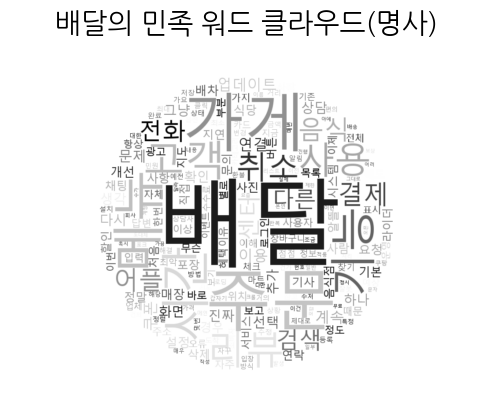

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np
mask = np.array(Image.open("resources\image.png"))

wc = WordCloud(
    font_path= "C:\Windows\Fonts\malgun.ttf",
    background_color= "white",
    colormap= "gist_yarg",
    width= 800,
    height= 400,
    mask=mask
)

wc.generate_from_frequencies(counter)

plt.Figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize= 20)
plt.show()

['걸리다', '하다', '들어가다', '불다', '하다', '깨다', '나오다', '누르다', '않다', '건지다', '모르다', '기다리다', '먹다', '돼다', '시키다', '깔다', '하다', '하다', '시키다', '먹다', '시키다', '하다', '하다', '바뀌다', '하다', '바뀌다', '밀리다', '만들다', '놓다', '하다', '나가다', '하다', '만들다', '하다', '하다', '하다', '끄다', '바뀌다', '하다', '하다', '이뤄지다', '하다', '하다', '넘다', '남기다', '놓다', '하다', '이르다', '하다', '내다', '바라다', '줄이다', '담다', '올리다', '내리다', '움직이다', '넘어가다', '버리다', '넘어오다', '하다', '두다', '되어다', '올라가다', '되다', '벗어나다', '가다', '쓸다', '누르다', '하다', '되다', '넘다', '하다', '하다', '느끼다', '가다', '되어다', '하다', '하다', '내다', '누르다', '떼다', '하다', '되다', '되다', '넘어가다', '되어다', '하다', '하다', '바꾸다', '해주다', '열다', '되어다', '까먹다', '하다', '바꾸다', '해주다', '먹다', '받다', '보다', '먹다', '가져오다', '만들다', '되다', '되다', '하다', '보이다', '보이다', '하다', '찾다', '찾다', '나오다', '시키다', '먹다', '보다', '시키다', '먹다', '지나다', '하다', '지다', '시키다', '먹다', '보다', '지다', '자다', '하다', '가다', '하다', '하다', '하다', '꺼리다', '지다', '싸다', '오다', '비다', '차다', '해주다', '하다', '나다', '하다', '하다', '늦다', '늦다', '하다', '모르다', '하다', '잡히다', '하다', '해주다', '해주다', '하다', '적다', '들다', '들다', '되다', '되다', '

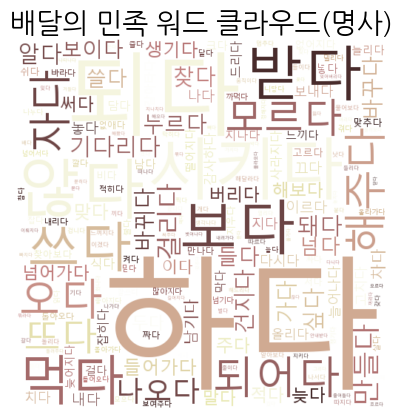

In [23]:
# 배달의 민족 댓글 "동사"에 대한 워드 클라우드
# norm, stem
# gpt 이용해서 새로운 마스크 만들어보고 적용해보기

word_list = []
stopwords = []

for i, review in enumerate(data["댓글"].tolist()):
    new_review = re.sub("[^가-힣\s]", "", review)
    
    result = okt.pos(new_review, stem= True)

    for word, pos in result:
        if (len(word) == 1) or (pos != "Verb"):
            continue
        word_list.append(word)
print(word_list)    

counter = Counter(word_list)
print(counter)

lc = WordCloud(
    font_path= "C:\Windows\Fonts\malgun.ttf",
    background_color= "white",
    colormap= "pink_r",
    width= 500,
    height= 500,
    # mask=mask
)

lc.generate_from_frequencies(counter)


plt.Figure(figsize=(5, 5))
plt.imshow(lc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize= 20)
plt.show()


## 5) 검색

In [24]:
# 명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?
# "취소" 단어가 있는 문장들만 검색
keyword = "취소"

extract_data = data.loc[data["댓글"].str.contains(keyword),:]
extract_data.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
14,편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워...
27,응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 ...
32,최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필...
33,최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키...


In [25]:
for review in extract_data["댓글"]:
    print(review)
    print("="*100)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워낙 친절한 매장이라 이게 무슨 일이지 하고 전화를 걸어보려 했는데 그 매장이 아니라 편의점 고객센터로 연결되네요? 심지어 주말이라 고객센터는 받지도 않고..ㅠㅠㅠ 계속 기다렸는데.. 곧 나가야 해서 이제 와서 다른 걸 시킬 수도 없고요 바쁠 수도 있고 재고가 없을 수도 있는 거 다 이해하고 평소에 친절하게 대응했던 매장이라 엄청 화는 안 나요 다만 오래 기다렸으니까 취소할 때는 왜 안되는지 정확한 사유를 말해주셨으면 좋겠어요 그리고 편의점에서 부족한 게 있을 때 부분 취소는 안되는 걸까요? 안된다면 이런 점도 개선됐으면 좋겠어요 그래야 서로 편할거같아요
응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 안하면 적어도 취소라도 하게 해야죠. 전화도 안되고 채팅도 안되면 이런 문제상황이 발생했을때 어떻게 대처하려고 그러시나 배민 수준 점점 떨어지는게 보이네요. 앞으로는 이용 안할 생각입니다
최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필요. 고객센터 연결 절대안되고 그냥 고객은 환불도 못받고 무작정 기다려야 함. 주문한 가게에서는 환불하려면 고객이 직접 고객센터 연결해야한다고만 하고.. 그래서 배달시켰는데 제가 포장하는것마냥 직접 걸어갔다왔습니다^^ 할인쿠폰 준다고 절대 사용하지 마세요^^
최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키고 알뜰 배달로도 시켜봐도 이런 일이 가끔 발생하는거 보면 특정 시스템이 아니라 배민 자체의 문제 같은데 

### + Kiwi 형태소 분석기 체험

In [26]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"

for res, score in kiwi.analyze(text, top_n=5):
    print(score, result, sep="\t")

-65.28563690185547	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('분', 'Noun'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('시간', 'Noun'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.0050277709961	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('분', 'Noun'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('시간', 'Noun'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.7073745727539	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('분', 'Noun'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시',

In [27]:
text = "분명 배달이 완료되었는데 나는 받지 않았어"

kiwi = Kiwi()
result = kiwi.tokenize(text)
print(text)

분명 배달이 완료되었는데 나는 받지 않았어


In [28]:
# 명사만 추출
for res in result:
    if res.tag[0] == "N":
        print(res.form, res.tag)

배달 NNG
완료 NNG
나 NP


# 2. 장바구니 분석

In [31]:
data = pd.read_csv("data\배달의민족댓글2.csv", index_col=0)
data.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [ ]:
# 댓글을 반복문으로 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# 반복문으로 형태소 명사 단어들 담기
# sub_list에 명사 단어들 담기
# main_list에 sub_list 담기

In [ ]:
# main_list는 [[리뷰1에 대한 명사 단어들], [리뷰2에 대한 명사 단어들], ......] 형식으로 저장되어야 한다.

main_list = []

# for review in data["댓글"].tolist():
#     result = kiwi.tokenize(review)
#     # print(result)
#     sub_list = []

#     for res in result:
#         if res.tag[0] == "N":
#             sub_list.append(res.form)

#     main_list.append(sub_list)

# print(main_list)

for i, review in enumerate(data["댓글"].tolist()):
    print(f"{i}번째 리뷰 : {review}")
    # 조건 1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", )



[['분', '주문', '취소', '주문', '내역', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '무한', '로딩', '진행', '중', '주문', '내역', '정보', '정확', '코로나', '때문', '서버', '안정', '거', '뭐', '결국', '취소'], ['음식', '하나', '우리나라', '앱', '국내', '번호', '필요', '번호', '인증', '필수', '카드', '결제', '선택', '시', '은행', '앱', '인증', '번', '정도', '해외', '카드', '결제', '수단', '현금', '결제', '옵션', '음식', '하나', '나라', '우리', '나라', '강국', '핸드폰', '번호', '인증', '카드', '인증', '등', '불편', '스탭', '앱', '사용', '중', '쪽', '짜증', '저녁', '외국', '거주자', '방법', '해외', '카드', '결제'], ['업데이트', '때', '사용', '불편', '클릭', '번', '일반', '결제', '기본', '쪽', '구석', '집', '배달', '유도', '메인', '클릭', '일반', '결제', '클릭', '이제', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '클릭', '짓', '배민'], ['배달', '민족', '앱', '자체', '만족', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '것', '식당', '입장', '업주', '입장', '별점', '주문', '건수', '기대', '주문자', '입장', '맛', '식당', '대체', '점', '정확', '맛', '집', '탐색', '점', '앱', '자체', '평점', '점', '식사', '추구', '기대', '평점', '이', '애석', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '구'], ['장바구니', '불편', '비', '마트', 

uv add mlxtend

In [45]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)
df

,/배민,5,가게,가격,가계,가계도,가계부,가능,가독성,가맹점,...,횡포,효율,후,후기,후식,휴가,휴대폰,휴무,휴일,희망
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
